# Data cleaning 

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown
from sklearn.model_selection import train_test_split, GroupShuffleSplit
import sys
import random
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline
pd.options.display.max_columns = None
plt.rcParams["figure.figsize"]=20,10


In [93]:
X = pd.read_csv("../data/AMF_train_X_XCZw8r3.csv")
X_test = pd.read_csv("../data/AMF_test_X_uDs0jHH.csv")
display(Markdown("- The form of the data :"))
display(X.tail())

print("\n")
display(Markdown("- The number of lines in the data : **{0!s}**".format(X.shape[0])))

display(Markdown("- The number of Nan values in each column :"))
display(X.isnull().sum(axis = 0).to_frame(name='count'))

- The form of the data :

Index     Share      Day     Trader       OTR    OCR  OMR  \
105777  105778   Isin_84  Date_27  Trader_60  1.150000   23.0  NaN   
105778  105779  Isin_102  Date_18  Trader_60  1.352941   23.0  NaN   
105779  105780   Isin_12  Date_13  Trader_60  1.146667   86.0  NaN   
105780  105781   Isin_27  Date_30  Trader_60  1.179191  204.0  NaN   
105781  105782   Isin_47  Date_12  Trader_60  1.178571   66.0  NaN   

        min_time_two_events  mean_time_two_events  10_p_time_two_events  \
105777                  0.0            736.500080                   0.0   
105778                  0.0             63.672695                   0.0   
105779                  0.0            708.440816                   0.0   
105780                  0.0            384.893976                   0.0   
105781                  0.0            122.636320                   0.0   

        med_time_two_events  25_p_time_two_events  75_p_time_two_events  \
105777             0.000188              0.000039              0.003226   
105778             0.000963              0.000176             70.822190   
105779             0.000578              0.000062              1.023857   
105780             0.000536              0.000242              1.288446   
105781             0.000689              0.000095             14.449021   

        90_p_time_two_events  max_time_two_events  min_lifetime_cancel  \
105777            1228.04750           7609.94340            7609.9443   
105778             307.08710            392.75638             567.1530   
105779               4.95412          23448.52500           23448.5250   
105780             119.05335          19157.80900           19157.8090   
105781             227.87357           1614.68490             671.5796   

        mean_lifetime_cancel  10_p_lifetime_cancel  med_lifetime_cancel  \
105777           7609.944336             7609.9443            7609.9443   
105778            567.153015              567.1530             567.1530   
105779          23448.525391            23448.5250           23448.5250   
105780          19157.808594            19157.8090           19157.8090   
105781            671.579590              671.5796             671.5796   

        25_p_lifetime_cancel  75_p_lifetime_cancel  90_p_lifetime_cancel  \
105777             7609.9443             7609.9443             7609.9443   
105778              567.1530              567.1530              567.1530   
105779            23448.5250            23448.5250            23448.5250   
105780            19157.8090            19157.8090            19157.8090   
105781              671.5796              671.5796              671.5796   

        max_lifetime_cancel  NbTradeVenueMic  MaxNbTradesBySecond  \
105777            7609.9443                1                   15   
105778             567.1530                1                    4   
105779           23448.5250                1                   21   
105780           19157.8090                1                   30   
105781             671.5796                1                   29   

        MeanNbTradesBySecond  min_dt_TV1  mean_dt_TV1  med_dt_TV1  \
105777              6.666667       0.001   927.968000       0.004   
105778              2.428571       0.001   143.065500       0.569   
105779              4.687500       0.001  1157.596000       2.488   
105780              4.942857       0.001   435.646015       1.001   
105781              6.222222       0.001  2488.039583      14.449   

        min_dt_TV1_TV2  mean_dt_TV1_TV2  med_dt_TV1_TV2  min_dt_TV1_TV3  \
105777             NaN              NaN             NaN             NaN   
105778             NaN              NaN             NaN             NaN   
105779             NaN              NaN             NaN             NaN   
105780             NaN              NaN             NaN             NaN   
105781             NaN              NaN             NaN             NaN   

        mean_dt_TV1_TV3  med_dt_TV1_TV3  min_dt_TV1_

- The number of lines in the data : **105782**

- The number of Nan values in each column :

count
Index                           0
Share                           0
Day                             0
Trader                          0
OTR                          1683
OCR                             0
OMR                         47612
min_time_two_events             0
mean_time_two_events            0
10_p_time_two_events            0
med_time_two_events             0
25_p_time_two_events            0
75_p_time_two_events            0
90_p_time_two_events            0
max_time_two_events             0
min_lifetime_cancel             0
mean_lifetime_cancel            0
10_p_lifetime_cancel            0
med_lifetime_cancel             0
25_p_lifetime_cancel            0
75_p_lifetime_cancel            0
90_p_lifetime_cancel            0
max_lifetime_cancel             0
NbTradeVenueMic                 0
MaxNbTradesBySecond             0
MeanNbTradesBySecond            0
min_dt_TV1                   4235
mean_dt_TV1                  4235
med_dt_TV1                   4235
min_dt_TV1_TV2              25176
mean_dt_TV1_TV2             25176
med_dt_TV1_TV2              25176
min_dt_TV1_TV3              25255
mean_dt_TV1_TV3             25255
med_dt_TV1_TV3              25255
min_dt_TV1_TV4              25148
mean_dt_TV1_TV4             25148
med_dt_TV1_TV4              25148
NbSecondWithAtLeatOneTrade      0

## Analysis of the case where min/mean/med_dt_TV1 is Nan

In [94]:
X_TV1 = X[(X["min_dt_TV1"].isnull())]
display(Markdown("- The number of lines in the data : **{0!s}**".format(X_TV1.shape[0])))
display(X_TV1.isnull().sum(axis = 0).to_frame(name='count'))
display(Markdown("- The form of the data :"))
display(X_TV1.head(15))

- The number of lines in the data : **4235**

count
Index                           0
Share                           0
Day                             0
Trader                          0
OTR                          1676
OCR                             0
OMR                          2115
min_time_two_events             0
mean_time_two_events            0
10_p_time_two_events            0
med_time_two_events             0
25_p_time_two_events            0
75_p_time_two_events            0
90_p_time_two_events            0
max_time_two_events             0
min_lifetime_cancel             0
mean_lifetime_cancel            0
10_p_lifetime_cancel            0
med_lifetime_cancel             0
25_p_lifetime_cancel            0
75_p_lifetime_cancel            0
90_p_lifetime_cancel            0
max_lifetime_cancel             0
NbTradeVenueMic                 0
MaxNbTradesBySecond             0
MeanNbTradesBySecond            0
min_dt_TV1                   4235
mean_dt_TV1                  4235
med_dt_TV1                   4235
min_dt_TV1_TV2               4108
mean_dt_TV1_TV2              4108
med_dt_TV1_TV2               4108
min_dt_TV1_TV3               4169
mean_dt_TV1_TV3              4169
med_dt_TV1_TV3               4169
min_dt_TV1_TV4               4068
mean_dt_TV1_TV4              4068
med_dt_TV1_TV4               4068
NbSecondWithAtLeatOneTrade      0

- The form of the data :

Index     Share      Day      Trader   OTR    OCR  OMR  \
50      51  Isin_104  Date_30   Trader_10   4.0   4.00  NaN   
105    106   Isin_24  Date_10  Trader_105  23.0  23.00  NaN   
120    121   Isin_66  Date_18  Trader_105  17.0   8.50  NaN   
181    182   Isin_72  Date_19  Trader_105  39.0  13.00  NaN   
205    206   Isin_22  Date_27  Trader_105  15.0  15.00  NaN   
345    346   Isin_50  Date_19  Trader_105  19.0  19.00  NaN   
424    425    Isin_1  Date_24  Trader_105  33.0  16.50  NaN   
464    465   Isin_24   Date_8  Trader_105  21.0  21.00  NaN   
499    500   Isin_69  Date_25  Trader_105  48.0  16.00  NaN   
574    575   Isin_41  Date_25  Trader_105  16.0  16.00  NaN   
636    637  Isin_107  Date_12  Trader_105  15.0   7.50  NaN   
673    674   Isin_63  Date_18  Trader_105  43.0  10.75  NaN   
719    720   Isin_43  Date_30  Trader_105  24.0  24.00  NaN   
839    840    Isin_5  Date_23  Trader_105  18.0   9.00  NaN   
846    847    Isin_1  Date_26  Trader_105  17.0  17.00  NaN   

     min_time_two_events  mean_time_two_events  10_p_time_two_events  \
50                 0.000              3.035069                 0.000   
105                0.000           7154.668945                 0.000   
120                0.000           7787.023763                 0.000   
181                0.000           7468.680581                 0.000   
205                0.000          24755.382812                 0.000   
345             1171.153           1562.968506              1171.153   
424                0.000           4741.324219                 0.000   
464                0.000          17779.605469                 0.000   
499                0.000           4198.726906                 0.000   
574                0.000           6399.922852                 0.000   
636                0.000          25395.980469                 0.000   
673                0.000          12185.342095                 0.000   
719                0.000           5610.360026                 0.000   
839                0.000           2266.744624                 0.000   
846                0.000          10156.153849                 0.000   

     med_time_two_events  25_p_time_two_events  75_p_time_two_events  \
50               0.00000                 0.000              6.070138   
105           2435.25500                 0.000          19028.752000   
120            443.90723                 0.000          22917.164000   
181            455.78262                 0.000          12235.042000   
205              0.00000                 0.000          49510.766000   
345           1171.15300              1171.153           1954.784000   
424              0.00000                 0.000              0.000000   
464              0.00000                 0.000          35559.210000   
499              0.00000                 0.000           7808.173000   
574              0.00000                 0.000              0.000000   
636          26328.73000                 0.000          49859.210000   
673           3360.08860                 0.000          22241.390000   
719              0.00000                 0.000          16831.080000   
839              0.00000                 0.000           1509.792400   
846           1364.70180                 0.000          29103.760000   

     90_p_time_two_events  max_time_two_events  min_lifetime_cancel  \
50               6.070138             6.070138             6.070138   
105          19028.752000         19028.752000         19028.752000   
120          22917.164000         22917.164000           443.907230   
181          36004.992000         36004.992000          3584.947300   
205          49510.766000         49510.766000         49510.766000   
345           1954.784000          1954.784000          1954.784000   
424          17358.113000         49020.426000         17358.113000   
464          35559.210000         35559.210000         35559.210000   
499          17356.797000         17356.797000     

In [95]:
X_OTR = X[(X["OTR"].isnull()) & ~(X["min_dt_TV1"].isnull())]
display(X_OTR.shape)
display(X_OTR.head(15))
display(X_OTR.isnull().sum(axis = 0).to_frame(name='count'))

(7, 39)

Index     Share      Day      Trader  OTR   OCR       OMR  \
25109  25110   Isin_60  Date_13  Trader_179  NaN   9.5  1.266667   
25942  25943   Isin_11  Date_24  Trader_179  NaN  13.5  1.227273   
50475  50476   Isin_58   Date_5  Trader_257  NaN   3.0       NaN   
50829  50830   Isin_27   Date_7   Trader_26  NaN  17.5  1.129032   
58849  58850    Isin_7  Date_11  Trader_285  NaN   2.0       NaN   
58852  58853  Isin_118  Date_11  Trader_285  NaN   2.0       NaN   
58856  58857  Isin_114  Date_11  Trader_285  NaN   2.0       NaN   

       min_time_two_events  mean_time_two_events  10_p_time_two_events  \
25109            46.619434           1685.725933              91.74545   
25942            30.163685           2539.974775             343.35330   
50475          2537.338400           2537.338379            2537.33840   
50829             5.314763           1771.444828             190.82303   
58849         21258.127000          21258.126953           21258.12700   
58852         21261.256000          21261.255859           21261.25600   
58856         21261.217000          21261.216797           21261.21700   

       med_time_two_events  25_p_time_two_events  75_p_time_two_events  \
25109             584.5514             250.34796             1562.5269   
25942            1364.5985             774.23553             3115.5667   
50475            2537.3384            2537.33840             2537.3384   
50829            1401.6555             291.77615             2506.6360   
58849           21258.1270           21258.12700            21258.1270   
58852           21261.2560           21261.25600            21261.2560   
58856           21261.2170           21261.21700            21261.2170   

       90_p_time_two_events  max_time_two_events  min_lifetime_cancel  \
25109             3619.3564           17550.6950           11102.6130   
25942             4775.0596           15858.7350           30479.6100   
50475             2537.3384            2537.3384            2537.3384   
50829             3995.7666            5486.2607           29228.8400   
58849            21258.1270           21258.1270           21258.1270   
58852            21261.2560           21261.2560           21261.2560   
58856            21261.2170           21261.2170           21261.2170   

       mean_lifetime_cancel  10_p_lifetime_cancel  med_lifetime_cancel  \
25109          14328.670654            11102.6130           11105.9440   
25942          30479.697266            30479.6100           30479.6100   
50475           2537.338379             2537.3384            2537.3384   
50829          29228.839844            29228.8400           29228.8400   
58849          21258.126953            21258.1270           21258.1270   
58852          21261.255859            21261.2560           21261.2560   
58856          21261.216797            21261.2170           21261.2170   

       25_p_lifetime_cancel  75_p_lifetime_cancel  90_p_lifetime_cancel  \
25109            11102.6130            17550.6950            17555.4300   
25942            30479.6100            30479.7850            30479.7850   
50475             2537.3384             2537.3384             2537.3384   
50829            29228.8400            29228.8400            29228.8400   
58849            21258.1270            21258.1270            21258.1270   
58852            21261.2560            21261.2560            21261.2560   
58856            21261.2170            21261.2170            21261.2170   

       max_lifetime_cancel  NbTradeVenueMic  MaxNbTradesBySecond  \
25109           17555.4300                6                    6   
25942           30479.7850                2                    3   
50475            2537.3384                1                    8   
50829           29228.8400                1                    1   
58849           21258.1270               10                    5   
58852           21261.2560                8                   12   
58856           21261

count
Index                           0
Share                           0
Day                             0
Trader                          0
OTR                             7
OCR                             0
OMR                             4
min_time_two_events             0
mean_time_two_events            0
10_p_time_two_events            0
med_time_two_events             0
25_p_time_two_events            0
75_p_time_two_events            0
90_p_time_two_events            0
max_time_two_events             0
min_lifetime_cancel             0
mean_lifetime_cancel            0
10_p_lifetime_cancel            0
med_lifetime_cancel             0
25_p_lifetime_cancel            0
75_p_lifetime_cancel            0
90_p_lifetime_cancel            0
max_lifetime_cancel             0
NbTradeVenueMic                 0
MaxNbTradesBySecond             0
MeanNbTradesBySecond            0
min_dt_TV1                      0
mean_dt_TV1                     0
med_dt_TV1                      0
min_dt_TV1_TV2                  2
mean_dt_TV1_TV2                 2
med_dt_TV1_TV2                  2
min_dt_TV1_TV3                  2
mean_dt_TV1_TV3                 2
med_dt_TV1_TV3                  2
min_dt_TV1_TV4                  2
mean_dt_TV1_TV4                 2
med_dt_TV1_TV4                  2
NbSecondWithAtLeatOneTrade      0

In [96]:
display(X.describe())


Index            OTR            OCR            OMR  \
count  105782.000000  104099.000000  105782.000000   58170.000000   
mean    52891.500000      34.435038      17.458787     164.469153   
std     30536.777425     137.261154      71.843225     929.010848   
min         1.000000       1.044444       2.000000       1.001960   
25%     26446.250000       3.709023       2.753802       3.253655   
50%     52891.500000       7.346154       4.789474      14.000000   
75%     79336.750000      22.707956      16.366667      73.689116   
max    105782.000000   17561.000000   14409.000000  127861.000000   

       min_time_two_events  mean_time_two_events  10_p_time_two_events  \
count        105782.000000         105782.000000         105782.000000   
mean             87.472164           2772.513578            103.310102   
std            1549.972501           4985.149536           1617.051421   
min               0.000000              0.000065              0.000000   
25%               0.000000             69.365666              0.000000   
50%               0.000000            262.325253              0.000109   
75%               0.000000           3801.273320              0.020739   
max           52568.766000          52568.765625          52568.766000   

       med_time_two_events  25_p_time_two_events  75_p_time_two_events  \
count        105782.000000         105782.000000         105782.000000   
mean           1011.630575            228.659560           4734.942457   
std            4967.426924           2319.866837          10431.964706   
min               0.000000              0.000000              0.000000   
25%               1.243868              0.000024             22.249021   
50%              10.154920              0.093957            114.957445   
75%              60.552090              2.836749           2277.450350   
max           52568.766000          52568.766000          60597.414000   

       90_p_time_two_events  max_time_two_events  min_lifetime_cancel  \
count         105782.000000        105782.000000        105782.000000   
mean            9786.032539         24292.035085          1945.038027   
std            14256.357615         17772.438572          6672.112738   
min                0.000000             0.000065             0.000007   
25%              117.771340          4410.907350             0.000583   
50%              480.715195         30166.389500             0.044144   
75%            20975.263250         37485.990000            35.497842   
max            60609.660000         71934.490000         53171.766000   

       mean_lifetime_cancel  10_p_lifetime_cancel  med_lifetime_cancel  \
count         105782.000000         105782.000000        105782.000000   
mean            5616.519744           2070.233540          4445.109364   
std             9140.189971           6809.714060          9372.947978   
min                0.000038              0.000016             0.000035   
25%               67.897392              0.043414             6.234451   
50%              272.333702              1.663752            35.734245   
75%             9185.177948             69.218030          2075.455025   
max            53171.765625          53171.766000         53171.766000   

       25_p_lifetime_cancel  75_p_lifetime_cancel  90_p_lifetime_cancel  \
count         105782.000000         105782.000000         105782.000000   
mean            2707.080480           8451.108964          11587.949910   
std             7531.875480          13270.509124          15667.418368   
min                0.000028              0.000038              0.000038   
25%                0.746623             30.724017            109.431107   
50%                8.251923            182.259375            596.792220   
75%              254.888130          16302.060250          23952.383000   
max            53171.766000          53646.010000          53909.210000   

       max_lifetime_cancel  NbTradeVenueMic  MaxNbTradesBy

In [97]:
display(X[(X["min_dt_TV1"].isnull()) & ~(X["OTR"].isnull())].head(20))

Index     Share      Day      Trader   OTR        OCR  OMR  \
50      51  Isin_104  Date_30   Trader_10   4.0   4.000000  NaN   
105    106   Isin_24  Date_10  Trader_105  23.0  23.000000  NaN   
120    121   Isin_66  Date_18  Trader_105  17.0   8.500000  NaN   
181    182   Isin_72  Date_19  Trader_105  39.0  13.000000  NaN   
205    206   Isin_22  Date_27  Trader_105  15.0  15.000000  NaN   
345    346   Isin_50  Date_19  Trader_105  19.0  19.000000  NaN   
424    425    Isin_1  Date_24  Trader_105  33.0  16.500000  NaN   
464    465   Isin_24   Date_8  Trader_105  21.0  21.000000  NaN   
499    500   Isin_69  Date_25  Trader_105  48.0  16.000000  NaN   
574    575   Isin_41  Date_25  Trader_105  16.0  16.000000  NaN   
636    637  Isin_107  Date_12  Trader_105  15.0   7.500000  NaN   
673    674   Isin_63  Date_18  Trader_105  43.0  10.750000  NaN   
719    720   Isin_43  Date_30  Trader_105  24.0  24.000000  NaN   
839    840    Isin_5  Date_23  Trader_105  18.0   9.000000  NaN   
846    847    Isin_1  Date_26  Trader_105  17.0  17.000000  NaN   
856    857   Isin_66  Date_27  Trader_105  13.0  13.000000  NaN   
915    916   Isin_62  Date_11  Trader_105  13.0  13.000000  NaN   
929    930   Isin_56  Date_12  Trader_105  14.0  14.000000  NaN   
937    938  Isin_112  Date_27  Trader_105  35.0  11.666667  NaN   
955    956   Isin_55  Date_12  Trader_105  36.0  36.000000  NaN   

     min_time_two_events  mean_time_two_events  10_p_time_two_events  \
50              0.000000              3.035069              0.000000   
105             0.000000           7154.668945              0.000000   
120             0.000000           7787.023763              0.000000   
181             0.000000           7468.680581              0.000000   
205             0.000000          24755.382812              0.000000   
345          1171.153000           1562.968506           1171.153000   
424             0.000000           4741.324219              0.000000   
464             0.000000          17779.605469              0.000000   
499             0.000000           4198.726906              0.000000   
574             0.000000           6399.922852              0.000000   
636             0.000000          25395.980469              0.000000   
673             0.000000          12185.342095              0.000000   
719             0.000000           5610.360026              0.000000   
839             0.000000           2266.744624              0.000000   
846             0.000000          10156.153849              0.000000   
856             0.000000             90.582469              0.000000   
915          3250.429700           9268.776367           3250.429700   
929          3046.401000          14503.638916           3046.401000   
937             0.000000           2749.372443              0.000000   
955             7.091807          20173.293950              7.091807   

     med_time_two_events  25_p_time_two_events  75_p_time_two_events  \
50              0.000000              0.000000              6.070138   
105          2435.255000              0.000000          19028.752000   
120           443.907230              0.000000          22917.164000   
181           455.782620              0.000000          12235.042000   
205             0.000000              0.000000          49510.766000   
345          1171.153000           1171.153000           1954.784000   
424             0.000000              0.000000              0.000000   
464             0.000000              0.000000          35559.210000   
499             0.000000              0.000000           7808.173000   
574             0.000000              0.000000              0.000000   
636         26328.730000              0.000000          49859.210000   
673          3360.088600              0.000000          22241.390000   
719             0.000000              0.000000          16831.080000   
839             0.000000              0.000000           1509.792400   
846 

# Data separation

In [98]:

y = pd.read_csv("../data/AMF_train_Y_omYQJZL.csv")

HFT_traders = list(y[y["type"]=="HFT"].Trader)
NON_HFT_traders = list(y[y["type"]=="NON HFT"].Trader)
MIX_traders = list(y[y["type"]=="MIX"].Trader)

random.seed(sys.maxsize)
validation_traders = random.sample(HFT_traders,int(len(HFT_traders)/3)) + random.sample(NON_HFT_traders,int(len(NON_HFT_traders)/3)) + random.sample(MIX_traders,int(len(MIX_traders)/3))
train_traders = HFT_traders + NON_HFT_traders + MIX_traders
train_traders = [trader for trader in train_traders if trader not in validation_traders]

X_train = X[X["Trader"].isin(train_traders)]
X_validation = X[X["Trader"].isin(validation_traders)]



# Missing values imputer

In [99]:
X_train_RF = X_train.merge(y,on='Trader')
X_train_RF = X_train_RF[X_train_RF["type"]!= "MIX"]
X_validation_RF = X_validation.merge(y,on='Trader')
X_validation_RF = X_validation_RF[X_validation_RF["type"]!= "MIX"]

drop_columns = ["Index","Share","Day","Trader","type"]
missing_values_cols = X_train_RF.isnull().sum(axis = 0)
missing_values_cols = missing_values_cols[missing_values_cols>0]
missing_values_cols = list(missing_values_cols.index)

y_train_RF = X_train_RF["type"].replace({"HFT":1,"NON HFT":0})
y_validation_RF = X_validation_RF["type"].replace({"HFT":1,"NON HFT":0})
X_train_RF.drop(columns=drop_columns,inplace=True)
X_validation_RF.drop(columns=drop_columns,inplace=True)

In [100]:
class MaxImputer(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        assert type(cols) == list, 'group_cols should be a list of columns'
        
        self.cols = cols
        self.max_values = {}
        
    def fit(self, X, y=None):
        
        self.max_values = {col:X[col].max() for col in self.cols}
        #self.max_values = {col:0 for col in self.cols}
        
        return self 
    
    def transform(self, X, y=None):
        
        X = X.copy()
        
        X.fillna(value=self.max_values,inplace=True)
        
        return X.values

In [101]:
print(pd.unique(y_train_RF))
print(pd.unique(y_validation_RF))


[0 1]
[1 0]


# Testing classifiers

## Random Forest classifier

In [102]:
param_grid = {"classifier__n_estimators":[100,120]}
clf = RandomForestClassifier(n_estimators=100)
model = Pipeline(steps=[('imputer', MaxImputer(missing_values_cols)), ('classifier', clf)])
#earch = GridSearchCV(model, param_grid, n_jobs=-1,cv=10)
model.fit(X_train_RF,y_train_RF)
#print("Best parameter (CV score=%0.3f):" % search.best_score_)
#print(search.best_params_)

print("This is the F1 score on validation :",f1_score(model.predict(X_validation_RF),y_validation_RF))

This is the F1 score on validation : 0.8406773318364673


# Finding thresholds

Trader  NON_HFT  HFT  Total  HFT_percentage  type
0    Trader_10       77    0     77             0.0     0
1   Trader_105     2052    0   2052             0.0     0
4   Trader_110        8    0      8             0.0     0
5   Trader_114     2193    0   2193             0.0     0
6   Trader_127        5    0      5             0.0     0
11  Trader_149        4    0      4             0.0     0
12  Trader_150       73    0     73             0.0     0
13  Trader_155       91    0     91             0.0     0
14  Trader_158      181    0    181             0.0     0
16  Trader_169      188    0    188             0.0     0
19  Trader_177      377    0    377             0.0     0
20  Trader_178       95    0     95             0.0     0
21  Trader_184      244    0    244             0.0     0
22  Trader_191        4    0      4             0.0     0
25  Trader_208        6    0      6             0.0     0
28  Trader_221      117    0    117             0.0     0
29  Trader_222      322    0    322             0.0     0
31  Trader_237       87    0     87             0.0     0
35  Trader_257        1    0      1             0.0     0
41  Trader_288       79    0     79             0.0     0
42  Trader_312     2229    0   2229             0.0     0
55  Trader_398      271    0    271             0.0     0
56  Trader_424     2039    0   2039             0.0     0
61  Trader_435       10    0     10             0.0     0
64  Trader_442       38    0     38             0.0     0
65  Trader_446       87    0     87             0.0     0
66   Trader_46       55    0     55             0.0     0
69   Trader_51      143    0    143             0.0     0
70   Trader_54      289    0    289             0.0     0
71   Trader_57       26    0     26             0.0     0
72   Trader_59       15    0     15             0.0     0
73   Trader_60       23    0     23             0.0     0

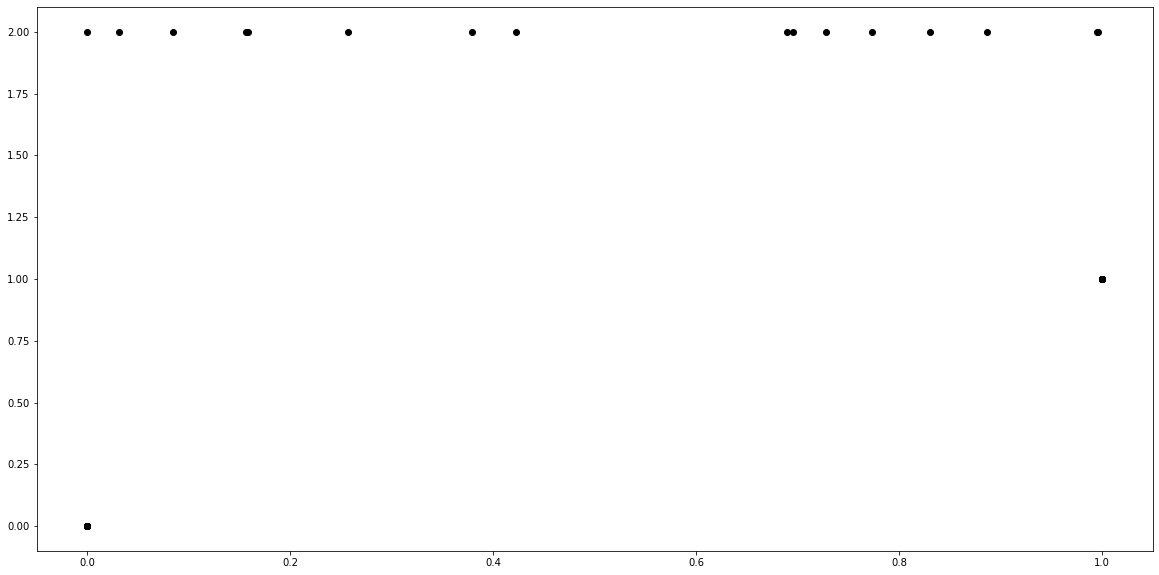

In [130]:
def HFT_percentage(model,X,drop = ["Index","Share","Day","Trader"]):
    X = X.copy()
    traders = X["Trader"]
    X.drop(columns=drop,inplace=True)
    row_type = model.predict(X)
    X["row_type"] = row_type
    X["Trader"] = traders
    counts = X.groupby(["Trader","row_type"])['OTR'].count()
    results = []
    for x in counts.index.get_level_values(0):
        l = [x]
        if counts.loc[x].shape[0] == 1:
            if counts.loc[x].index.values[0] == 0 :
                l.append(counts.loc[x].values[0])
                l.append(0)
            else:
                l.append(0)
                l.append(counts.loc[x].values[0])
        else:
            l.append(counts.loc[(x,0)])
            l.append(counts.loc[(x,1)])
    
        results.append(l)
    df = pd.DataFrame(data= results,columns=["Trader","NON_HFT","HFT"])
    
    df["Total"] = df["NON_HFT"] + df["HFT"]
    df["HFT_percentage"] = df["HFT"] / df["Total"]
 
    return df

df_threshold_train = HFT_percentage(model,X_train)
df_threshold_train = df_threshold_train.merge(y,on='Trader')
df_threshold_train["type"].replace({"NON HFT":0,"HFT":1,"MIX":2},inplace=True)
df_threshold_train.drop_duplicates(inplace=True)
display(df_threshold_train[df_threshold_train["type"]==0])
plt.scatter(df_threshold_train["HFT_percentage"], df_threshold_train["type"], color='black')
plt.show()
      
    
    
    

In [131]:
display(df_threshold_train[df_threshold_train["type"]==1])

Trader  NON_HFT   HFT  Total  HFT_percentage  type
7   Trader_132        0   780    780             1.0     1
8   Trader_136        0  2515   2515             1.0     1
15  Trader_161        0  7563   7563             1.0     1
30  Trader_226        0  2486   2486             1.0     1
32  Trader_244        0   497    497             1.0     1
38  Trader_278        0  2450   2450             1.0     1
43  Trader_328        0  2534   2534             1.0     1
48  Trader_341        0  1638   1638             1.0     1
51  Trader_385        0     8      8             1.0     1
52  Trader_386        0  5808   5808             1.0     1

In [132]:
display(df_threshold_train[df_threshold_train["type"]==2])

Trader  NON_HFT   HFT  Total  HFT_percentage  type
2   Trader_107      415  1420   1835        0.773842     2
9   Trader_140      484    91    575        0.158261     2
17  Trader_172     1527   934   2461        0.379521     2
23  Trader_205      251     8    259        0.030888     2
26  Trader_209     7580  2628  10208        0.257445     2
33  Trader_245      423  2075   2498        0.830665     2
36  Trader_264       13  2537   2550        0.994902     2
39  Trader_285        5     0      5        0.000000     2
44  Trader_330      767  1756   2523        0.695997     2
46  Trader_338        9    20     29        0.689655     2
49   Trader_38      254    47    301        0.156146     2
53  Trader_395      399   292    691        0.422576     2
57  Trader_430     4618   426   5044        0.084457     2
59  Trader_431        9  2543   2552        0.996473     2
62  Trader_438      552  1475   2027        0.727676     2
67  Trader_461      289  2258   2547        0.886533     2

In [133]:
clf = LinearDiscriminantAnalysis()
X_LDA_train = np.array(df_threshold_train["HFT_percentage"]).reshape(-1,1)
y_LDA_train = np.array(df_threshold_train["type"])
clf.fit(X_LDA_train,y_LDA_train)

df_threshold_train["predicted_types"] = clf.predict(X_LDA_train)

display(df_threshold_train)
print("This is the F1 score on validation :",f1_score(df_threshold_train["type"],df_threshold_train["predicted_types"],average='micro'))

Trader  NON_HFT   HFT  Total  HFT_percentage  type  predicted_types
0    Trader_10       77     0     77        0.000000     0                0
1   Trader_105     2052     0   2052        0.000000     0                0
2   Trader_107      415  1420   1835        0.773842     2                2
4   Trader_110        8     0      8        0.000000     0                0
5   Trader_114     2193     0   2193        0.000000     0                0
6   Trader_127        5     0      5        0.000000     0                0
7   Trader_132        0   780    780        1.000000     1                1
8   Trader_136        0  2515   2515        1.000000     1                1
9   Trader_140      484    91    575        0.158261     2                0
11  Trader_149        4     0      4        0.000000     0                0
12  Trader_150       73     0     73        0.000000     0                0
13  Trader_155       91     0     91        0.000000     0                0
14  Trader_158      181     0    181        0.000000     0                0
15  Trader_161        0  7563   7563        1.000000     1                1
16  Trader_169      188     0    188        0.000000     0                0
17  Trader_172     1527   934   2461        0.379521     2                2
19  Trader_177      377     0    377        0.000000     0                0
20  Trader_178       95     0     95        0.000000     0                0
21  Trader_184      244     0    244        0.000000     0                0
22  Trader_191        4     0      4        0.000000     0                0
23  Trader_205      251     8    259        0.030888     2                0
25  Trader_208        6     0      6        0.000000     0                0
26  Trader_209     7580  2628  10208        0.257445     2                0
28  Trader_221      117     0    117        0.000000     0                0
29  Trader_222      322     0    322        0.000000     0                0
30  Trader_226        0  2486   2486        1.000000     1                1
31  Trader_237       87     0     87        0.000000     0                0
32  Trader_244        0   497    497        1.000000     1                1
33  Trader_245      423  2075   2498        0.830665     2                1
35  Trader_257        1     0      1        0.000000     0                0
36  Trader_264       13  2537   2550        0.994902     2                1
38  Trader_278        0  2450   2450        1.000000     1                1
39  Trader_285        5     0      5        0.000000     2                0
41  Trader_288       79     0     79        0.000000     0                0
42  Trader_312     2229     0   2229        0.000000     0                0
43  Trader_328        0  2534   2534        1.000000     1                1
44  Trader_330      767  1756   2523        0.695997     2                2
46  Trader_338        9    20     29        0.689655     2                2
48  Trader_341        0  1638   1638        1.000000     1                1
49   Trader_38      254    47    301        0.156146     2                0
51  Trader_385        0     8      8        1.000000     1                1
52  Trader_386        0  5808   5808        1.000000     1                1
53  Trader_395      399   292    691        0.422576     2                2
55  Trader_398      271     0    271        0.000000     0                0
56  Trader_424     2039     0   2039        0.000000     0                0
57  Trader_430     4618   426   5044        0.084457     2                0
59  Trader_431        9  2543   2552        0.996473     2                1
61  Trader_435       10     0     10        0.000000     0                0
62  Trader_438      552  1475   2027        0.727676     2                2
64  Trader_442       38     0     38        0.000000     0                0
65  Trader_446       87     0     87        0.000000     0                0
66   Trader_46       55     0     55        0.000000    

This is the F1 score on validation : 0.8275862068965517


In [143]:
df_threshold_test = HFT_percentage(model,X_test)


In [144]:
hft_percentage_test = np.array(df_threshold_test["HFT_percentage"]).reshape(-1,1)
df_threshold_test["type"] = clf.predict(hft_percentage_test)
{"NON HFT":0,"HFT":1,"MIX":2}
df_threshold_test["type"] = df_threshold_test["type"].replace({0:"NON HFT",1:"HFT",2:"MIX"})
df_threshold_test = df_threshold_test[["Trader","type"]]
df_threshold_test.drop_duplicates(inplace=True)
display(df_threshold_test)

Trader     type
0            Adelaide  NON HFT
1               Alana  NON HFT
2             Alcmene  NON HFT
4               Alice      HFT
5       Alices Sister  NON HFT
..                ...      ...
128           Monstro  NON HFT
129           Morgana  NON HFT
131      The Doorknob      MIX
133       The Doorman      HFT
135  The Magic Mirror      HFT

[85 rows x 2 columns]

In [145]:
df_threshold_test.to_csv("../data/submission_RF_HFT_NONHFT.csv",index=False)